In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as npy
import pylab as py

from scipy.io import netcdf
import scipy.signal as si

from matplotlib.colors import LogNorm
from mpl_toolkits.basemap import Basemap


%matplotlib inline

In [2]:
import sys
sys.path.append('/home/albert/python')
print(sys.path)

['', '/home/albert/anaconda2/lib/python2.7/site-packages/oocgcm-0.1.0-py2.7.egg', '/home/albert/anaconda2/lib/python2.7/site-packages/numpy-1.11.1-py2.7-linux-x86_64.egg', '/home/albert/anaconda2/lib/python27.zip', '/home/albert/anaconda2/lib/python2.7', '/home/albert/anaconda2/lib/python2.7/plat-linux2', '/home/albert/anaconda2/lib/python2.7/lib-tk', '/home/albert/anaconda2/lib/python2.7/lib-old', '/home/albert/anaconda2/lib/python2.7/lib-dynload', '/home/albert/anaconda2/lib/python2.7/site-packages/Sphinx-1.4.1-py2.7.egg', '/home/albert/anaconda2/lib/python2.7/site-packages/setuptools-23.0.0-py2.7.egg', '/home/albert/anaconda2/lib/python2.7/site-packages', '/home/albert/anaconda2/lib/python2.7/site-packages/IPython/extensions', '/home/albert/.ipython', '/home/albert/python']


In [3]:
import PyRaf_colormaps as raf
import matplotlib as mpl

In [4]:
fdir = "/home/albert/Data/precips/ALL_NWD_CUT_MASK_onNCEP/"

nwdfile1 = fdir + 'nwd_GPCP-NCEPR1_interp_mask.nc'
nwdfile2 = fdir + 'nwd_TRMM-NCEPR1_interp_mask.nc'
nwdfile3 = fdir + 'nwd_NCEP-R1_mask.nc'
nwdfile4 = fdir + 'nwd_NCEP-R2_mask.nc'
nwdfile5 = fdir + 'nwd_MERRA-NCEPR1_interp_mask.nc'
nwdfile6 = fdir + 'nwd_CFSR-NCEPR1_interp_mask.nc'
nwdfile7 = fdir + 'nwd_ERAinterim-NCEPR1_interp_mask.nc'


In [12]:
fdir = "/home/albert/Data/precips/ALL_NWD_CUT_MASK_onNCEP/"

nwdmsfile1 = fdir + 'nwd_GPCP_mensuel-NCEPR1_interp_mask.nc'
nwdmsfile2 = fdir + 'nwd_TRMM_mensuel-NCEPR1_interp_mask.nc'
nwdmsfile3 = fdir + 'nwd_mensuel_NCEP-R1_mask.nc'
nwdmsfile4 = fdir + 'nwd_mensuel_NCEP-R2_mask.nc'
nwdmsfile5 = fdir + 'nwd_MERRA_mensuel-NCEPR1_interp.nc'
nwdmsfile6 = fdir + 'nwd_CFSR_mensuel-NCEPR1_interp_mask.nc'
nwdmsfile7 = fdir + 'nwd_ERAinterim_mensuel-NCEPR1_interp_mask.nc'



In [5]:
fnwd1 = netcdf.netcdf_file(nwdfile1,'r')
fnwd2 = netcdf.netcdf_file(nwdfile2,'r')
fnwd3 = netcdf.netcdf_file(nwdfile3,'r')
fnwd4 = netcdf.netcdf_file(nwdfile4,'r')
fnwd5 = netcdf.netcdf_file(nwdfile5,'r')
fnwd6 = netcdf.netcdf_file(nwdfile6,'r')
fnwd7 = netcdf.netcdf_file(nwdfile7,'r')


In [14]:
fnwdms1 = netcdf.netcdf_file(nwdmsfile1,'r')
fnwdms2 = netcdf.netcdf_file(nwdmsfile2,'r')
fnwdms3 = netcdf.netcdf_file(nwdmsfile3,'r')
fnwdms4 = netcdf.netcdf_file(nwdmsfile4,'r')
fnwdms5 = netcdf.netcdf_file(nwdmsfile5,'r')
fnwdms6 = netcdf.netcdf_file(nwdmsfile6,'r')
fnwdms7 = netcdf.netcdf_file(nwdmsfile7,'r')

In [6]:
nwd1 = fnwd1.variables['nwd']
nwd2 = fnwd2.variables['nwd']
nwd3 = fnwd3.variables['precip']
nwd4 = fnwd4.variables['precip']
nwd5 = fnwd5.variables['nwd']
nwd6 = fnwd6.variables['nwd']
nwd7 = fnwd7.variables['nwd']

lat1 = fnwd1.variables['lat']
lon1 = fnwd1.variables['lon']


In [16]:
nwdms1 = fnwdms1.variables['nwd']
nwdms2 = fnwdms2.variables['nwd']
nwdms3 = fnwdms3.variables['precip']
nwdms4 = fnwdms4.variables['precip']
nwdms5 = fnwdms5.variables['nwd']
nwdms6 = fnwdms6.variables['nwd']
nwdms7 = fnwdms7.variables['nwd']

lat1 = fnwd1.variables['lat']
lon1 = fnwd1.variables['lon']

In [7]:
lat1a=lat1[:]
lon1a=lon1[:]

nwd1a=nwd1[:]
nwd2a=nwd2[:]
nwd3a=nwd3[:]
nwd4a=nwd4[:]
nwd5a=nwd5[:]
nwd6a=nwd6[:]
nwd7a=nwd7[:]



In [18]:
nwdms1a=nwdms1[:]
nwdms2a=nwdms2[:]
nwdms3a=nwdms3[:]
nwdms4a=nwdms4[:]
nwdms5a=nwdms5[:]
nwdms6a=nwdms6[:]
nwdms7a=nwdms7[:]


In [8]:
mask=npy.equal(nwd1a,0.)
nwd1a_ma=npy.ma.array(nwd1a,mask=mask)
nwd2a_ma=npy.ma.array(nwd2a,mask=mask)
nwd3a_ma=npy.ma.array(nwd3a,mask=mask)
nwd4a_ma=npy.ma.array(nwd4a,mask=mask)
nwd5a_ma=npy.ma.array(nwd5a,mask=mask)
nwd6a_ma=npy.ma.array(nwd6a,mask=mask)
nwd7a_ma=npy.ma.array(nwd7a,mask=mask)



In [ ]:
maskms=npy.equal(nwdms1a,0.)
nwdms1a_ma=npy.ma.array(nwdms1a,mask=maskms)
nwdms2a_ma=npy.ma.array(nwdms2a,mask=maskms)
nwdms3a_ma=npy.ma.array(nwdms3a,mask=maskms)
nwdms4a_ma=npy.ma.array(nwdms4a,mask=maskms)
nwdms5a_ma=npy.ma.array(nwdms5a,mask=maskms)
nwdms6a_ma=npy.ma.array(nwdms6a,mask=maskms)
nwdms7a_ma=npy.ma.array(nwdms7a,mask=maskms)


In [9]:
lon2D1, lat2D1 = npy.meshgrid(lon1a, lat1a)



In [21]:
def plot(nwd,title):
 plt.pcolor(lon1a, lat1a,nwd[0],vmin=0,vmax=100)
 plt.axis([0, 360, -90, 90])
 plt.colorbar(orientation='horizontal')
 plt.title(title)
    
def plotdiff(nwd,title):
 plt.pcolor(lon1a, lat1a,nwd[0],vmin=-80,vmax=80,cmap='bwr')
 plt.axis([0, 360, -90, 90])
 plt.colorbar(orientation='horizontal')
 plt.title(title)

def map2d(nwd,title,vmin,vmax,cmap):
    map= Basemap(boundinglat=-60,resolution='l',area_thresh=1000.,\
          llcrnrlon=lon1a.min() ,llcrnrlat=lat1a.min(),\
          urcrnrlon=lon1a.max() , urcrnrlat=lat1a.max(),\
          suppress_ticks=False,\
          lat_0=lat1a.mean(),lon_0=lon1a.mean())
    map.drawcoastlines()
    map.fillcontinents(color='lightgrey')
    #map.drawmeridians(py.arange(-180,180,50))
    #map.drawparallels(py.arange(-90,90,50))
    CS=map.pcolormesh(lon1a,lat1a,nwd,vmin=vmin,vmax=vmax,cmap=cmap)
    CS.set_linewidth(0)
    plt.colorbar(orientation='horizontal')
    plt.title(title)
    plt.xlabel('Lon')
    plt.ylabel('Lat')


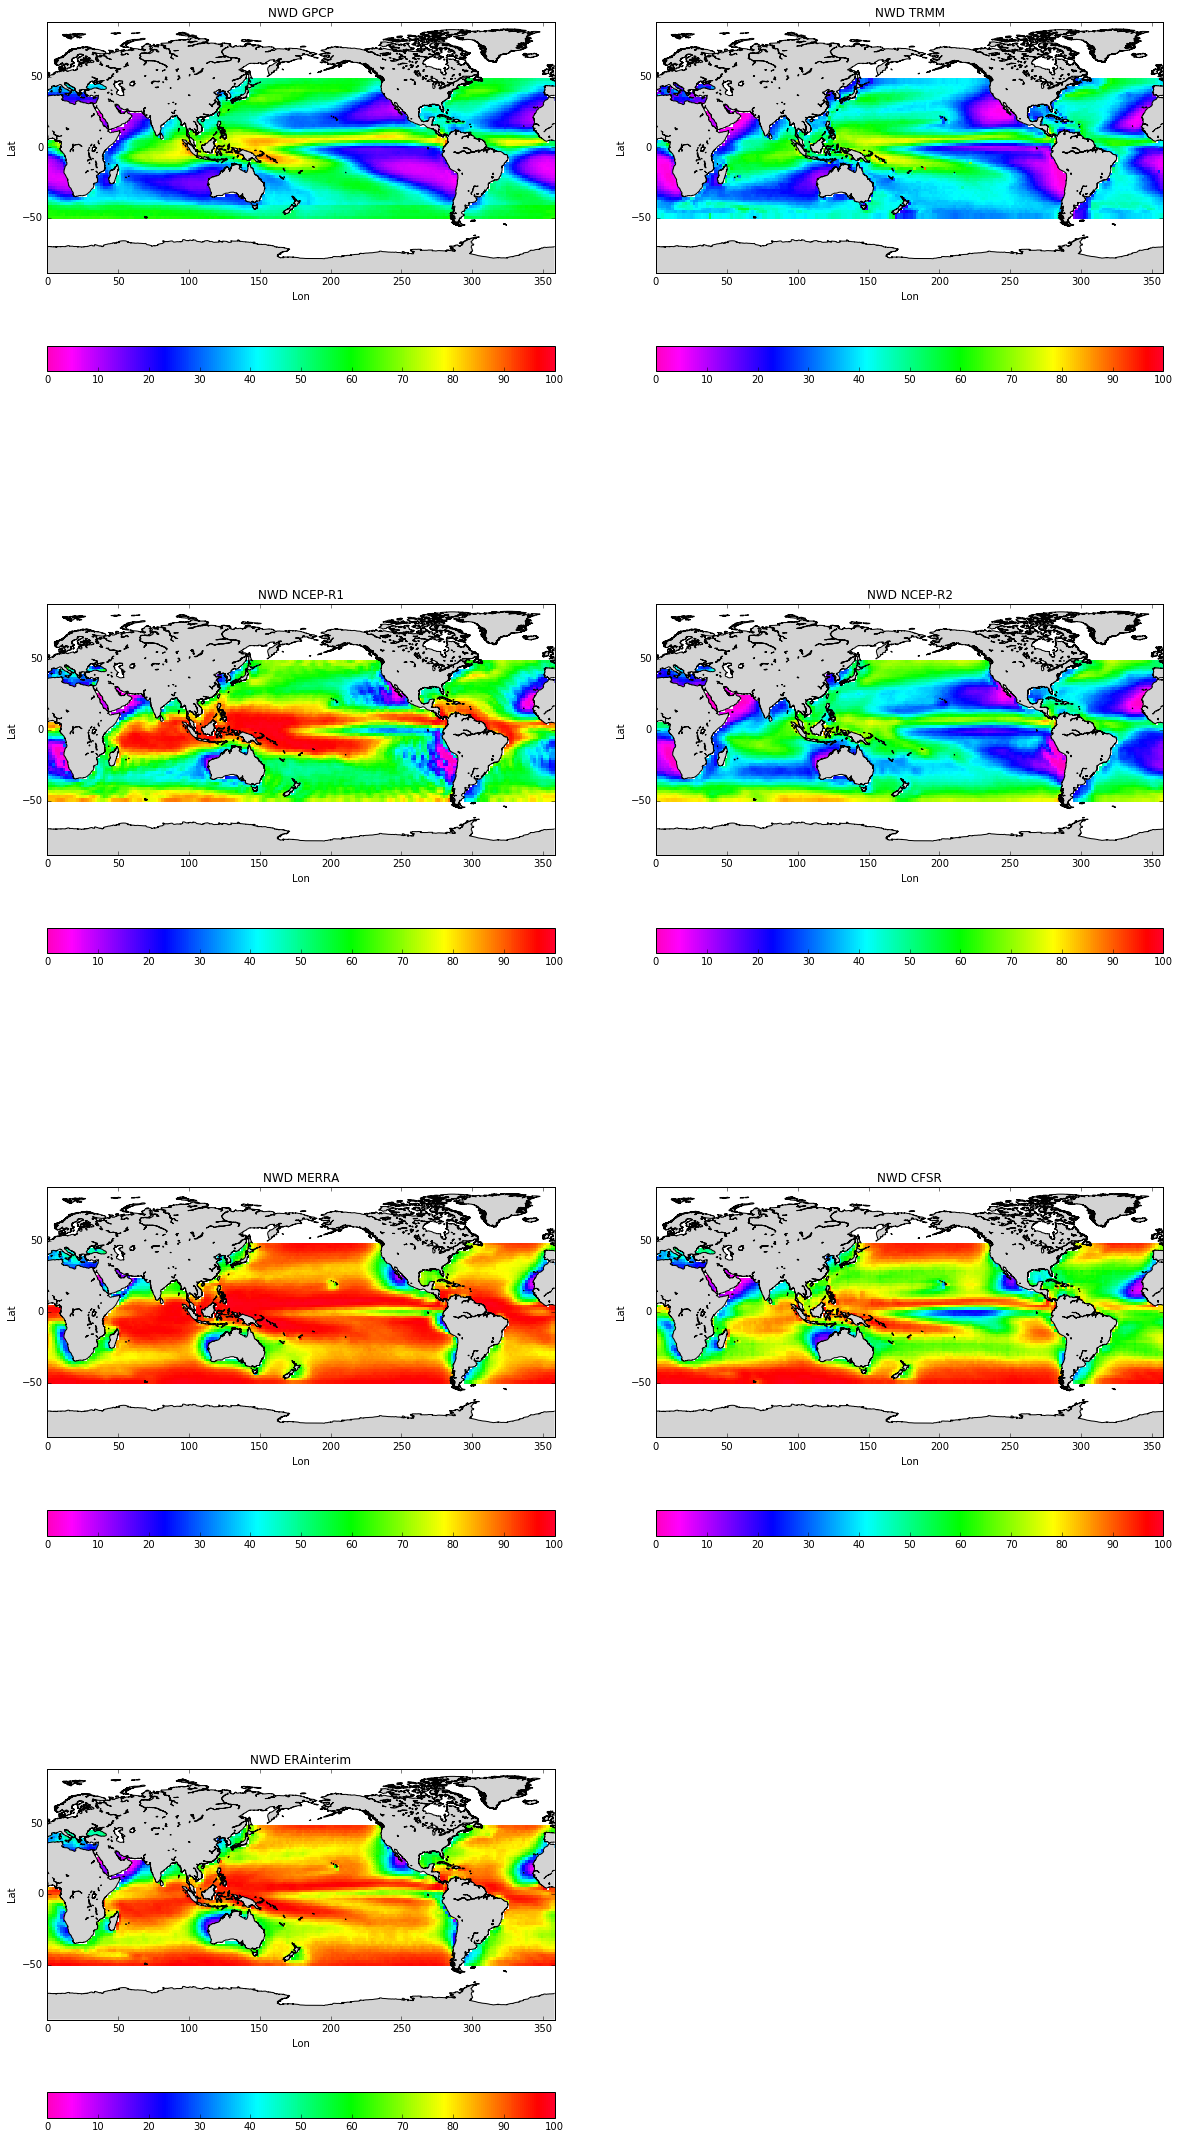

In [35]:
plt.figure(figsize=(20,40))
plt.subplot(4,2,1)
map2d(nwd1a_ma[0],'NWD GPCP',0,100,'gist_rainbow_r')
plt.subplot(4,2,2)
map2d(nwd2a_ma[0],'NWD TRMM',0,100,'gist_rainbow_r')
plt.subplot(4,2,3)            
map2d(nwd3a_ma[0],'NWD NCEP-R1',0,100,'gist_rainbow_r')
plt.subplot(4,2,4)            
map2d(nwd4a_ma[0],'NWD NCEP-R2',0,100,'gist_rainbow_r')
plt.subplot(4,2,5)            
map2d(nwd5a_ma[0],'NWD MERRA',0,100,'gist_rainbow_r')
plt.subplot(4,2,6)            
map2d(nwd6a_ma[0],'NWD CFSR',0,100,'gist_rainbow_r')
plt.subplot(4,2,7)            
map2d(nwd7a_ma[0],'NWD ERAinterim',0,100,'gist_rainbow_r')
plt.savefig('/home/albert/Data/precips/PLOTS/cartes_NWD_interp_on_NCEP.png')

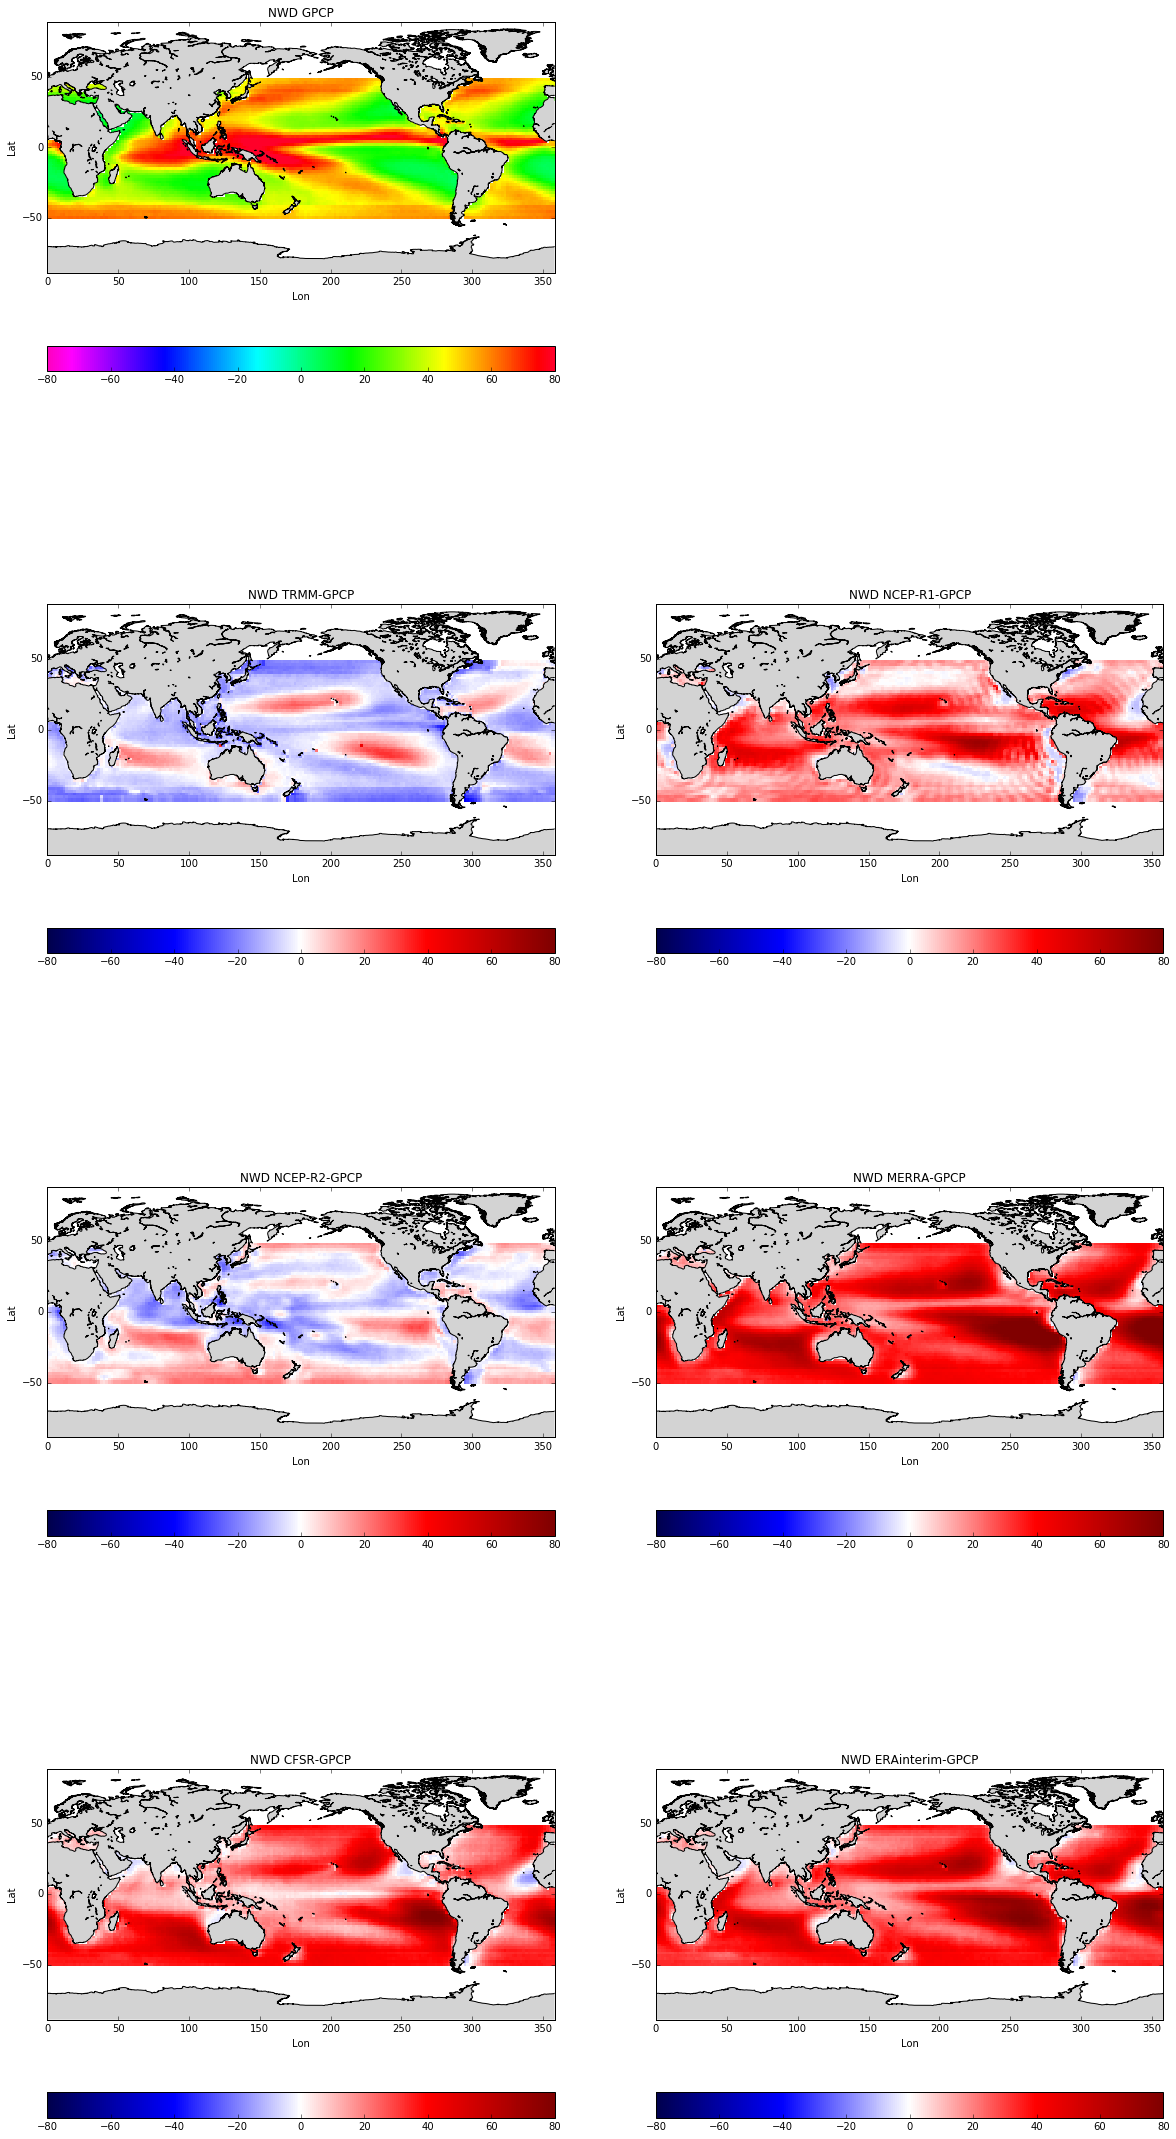

In [105]:
plt.figure(figsize=(20,40))
plt.subplot(4,2,1)
map2d(nwd1a_ma[0],'NWD GPCP',-80,80,'gist_rainbow_r')
plt.subplot(4,2,3)
map2d(nwd2a_ma[0]-nwd1a_ma[0],'NWD TRMM-GPCP',-80,80,'seismic')
plt.subplot(4,2,4)            
map2d(nwd3a_ma[0]-nwd1a_ma[0],'NWD NCEP-R1-GPCP',-80,80,'seismic')
plt.subplot(4,2,5)            
map2d(nwd4a_ma[0]-nwd1a_ma[0],'NWD NCEP-R2-GPCP',-80,80,'seismic')
plt.subplot(4,2,6)            
map2d(nwd5a_ma[0]-nwd1a_ma[0],'NWD MERRA-GPCP',-80,80,'seismic')
plt.subplot(4,2,7)            
map2d(nwd6a_ma[0]-nwd1a_ma[0],'NWD CFSR-GPCP',-80,80,'seismic')
plt.subplot(4,2,8)            
map2d(nwd7a_ma[0]-nwd1a_ma[0],'NWD ERAinterim-GPCP',-80,80,'seismic')
plt.savefig('/home/albert/Data/precips/PLOTS/cartes_NWD_diff-GPCP_interp_on_NCEP.png')

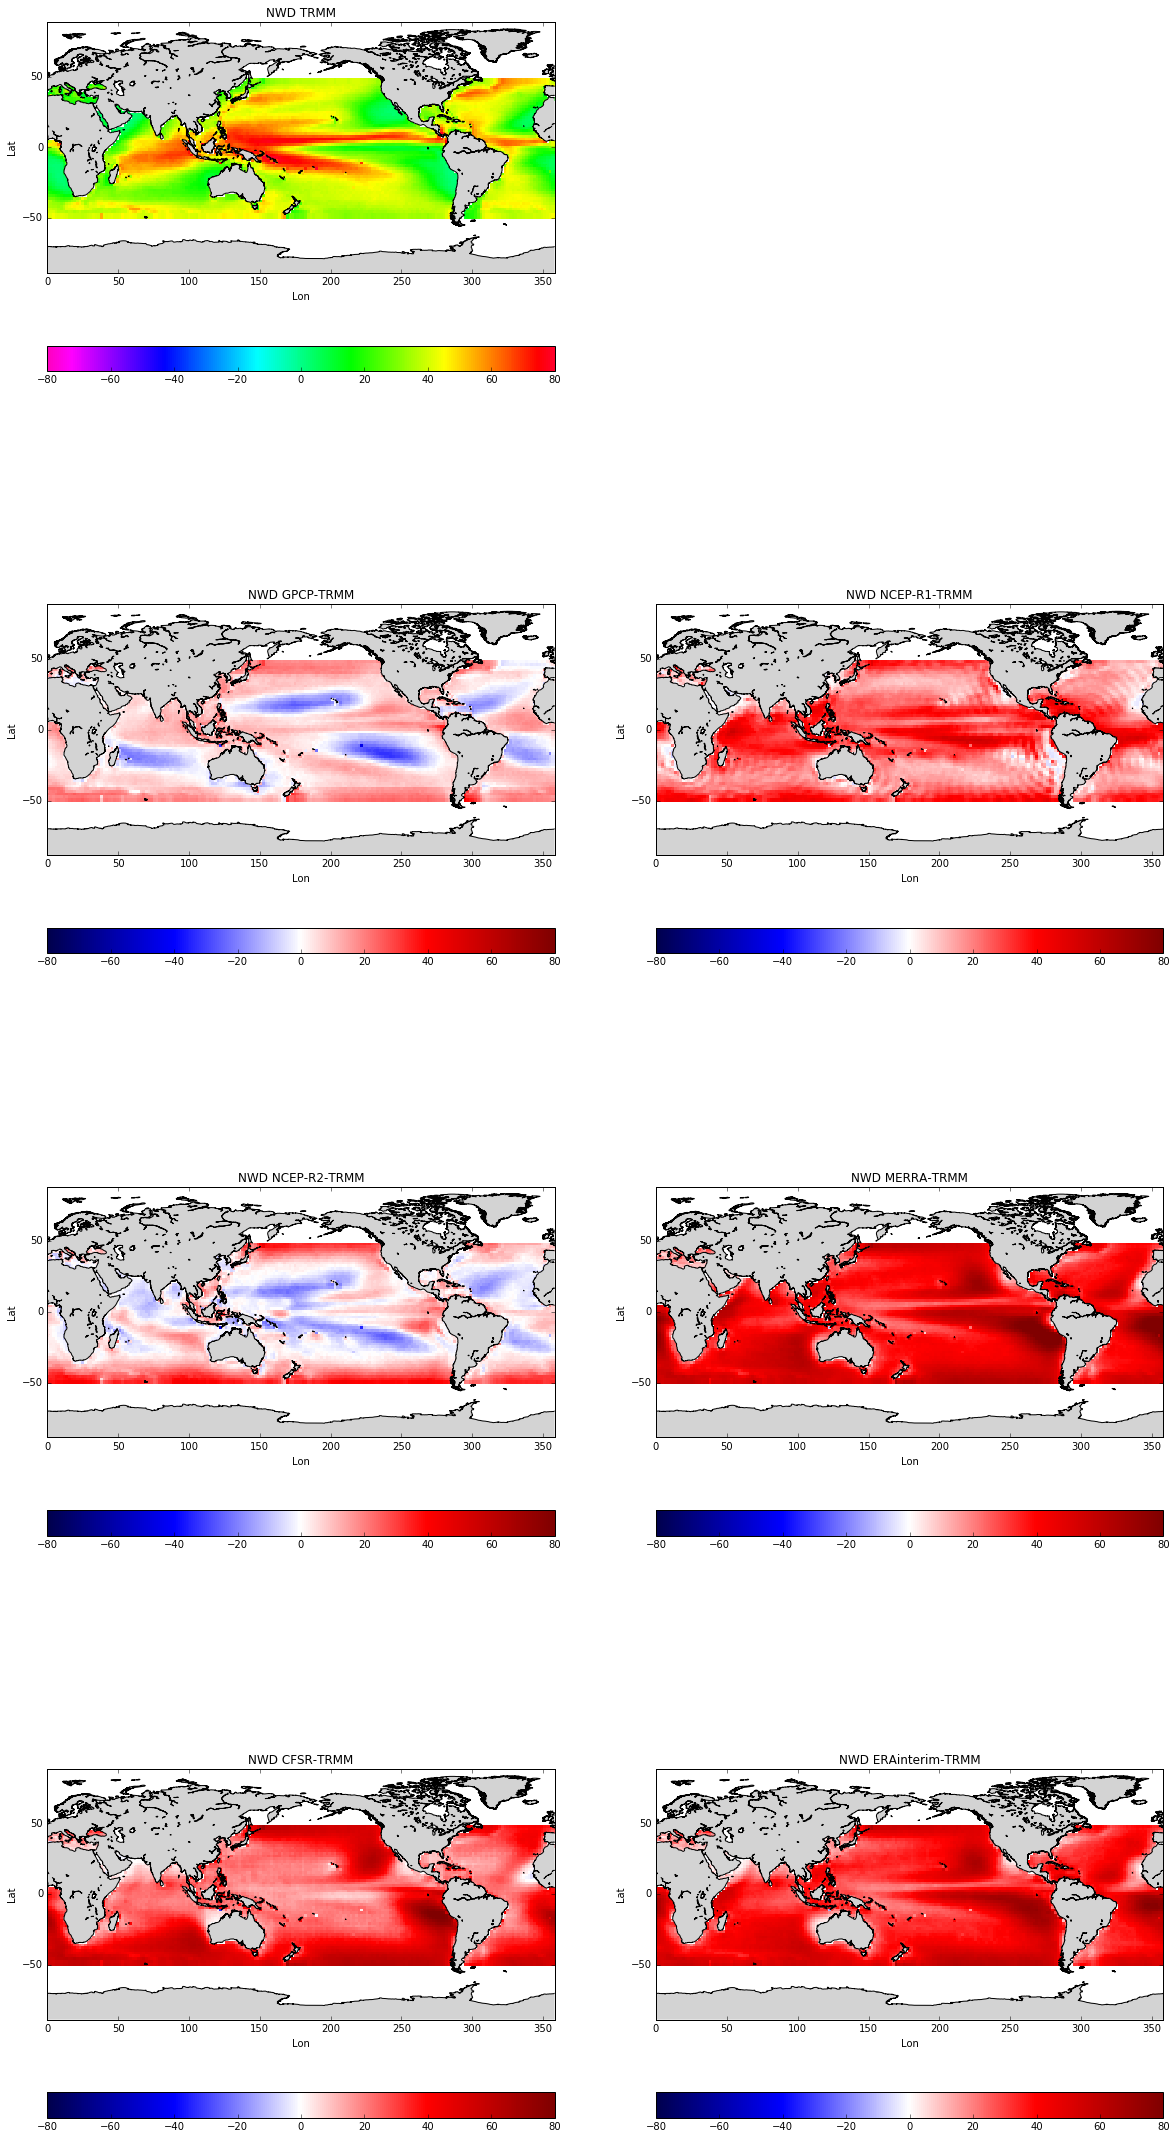

In [24]:
plt.figure(figsize=(20,40))
plt.subplot(4,2,1)
map2d(nwd2a_ma[0],'NWD TRMM',-80,80,'gist_rainbow_r')
plt.subplot(4,2,3)
map2d(nwd1a_ma[0]-nwd2a_ma[0],'NWD GPCP-TRMM',-80,80,'seismic')
plt.subplot(4,2,4)            
map2d(nwd3a_ma[0]-nwd2a_ma[0],'NWD NCEP-R1-TRMM',-80,80,'seismic')
plt.subplot(4,2,5)            
map2d(nwd4a_ma[0]-nwd2a_ma[0],'NWD NCEP-R2-TRMM',-80,80,'seismic')
plt.subplot(4,2,6)            
map2d(nwd5a_ma[0]-nwd2a_ma[0],'NWD MERRA-TRMM',-80,80,'seismic')
plt.subplot(4,2,7)            
map2d(nwd6a_ma[0]-nwd2a_ma[0],'NWD CFSR-TRMM',-80,80,'seismic')
plt.subplot(4,2,8)            
map2d(nwd7a_ma[0]-nwd2a_ma[0],'NWD ERAinterim-TRMM',-80,80,'seismic')
plt.savefig('/home/albert/Data/precips/PLOTS/cartes_NWD_diff-TRMM_interp_on_NCEP.png')

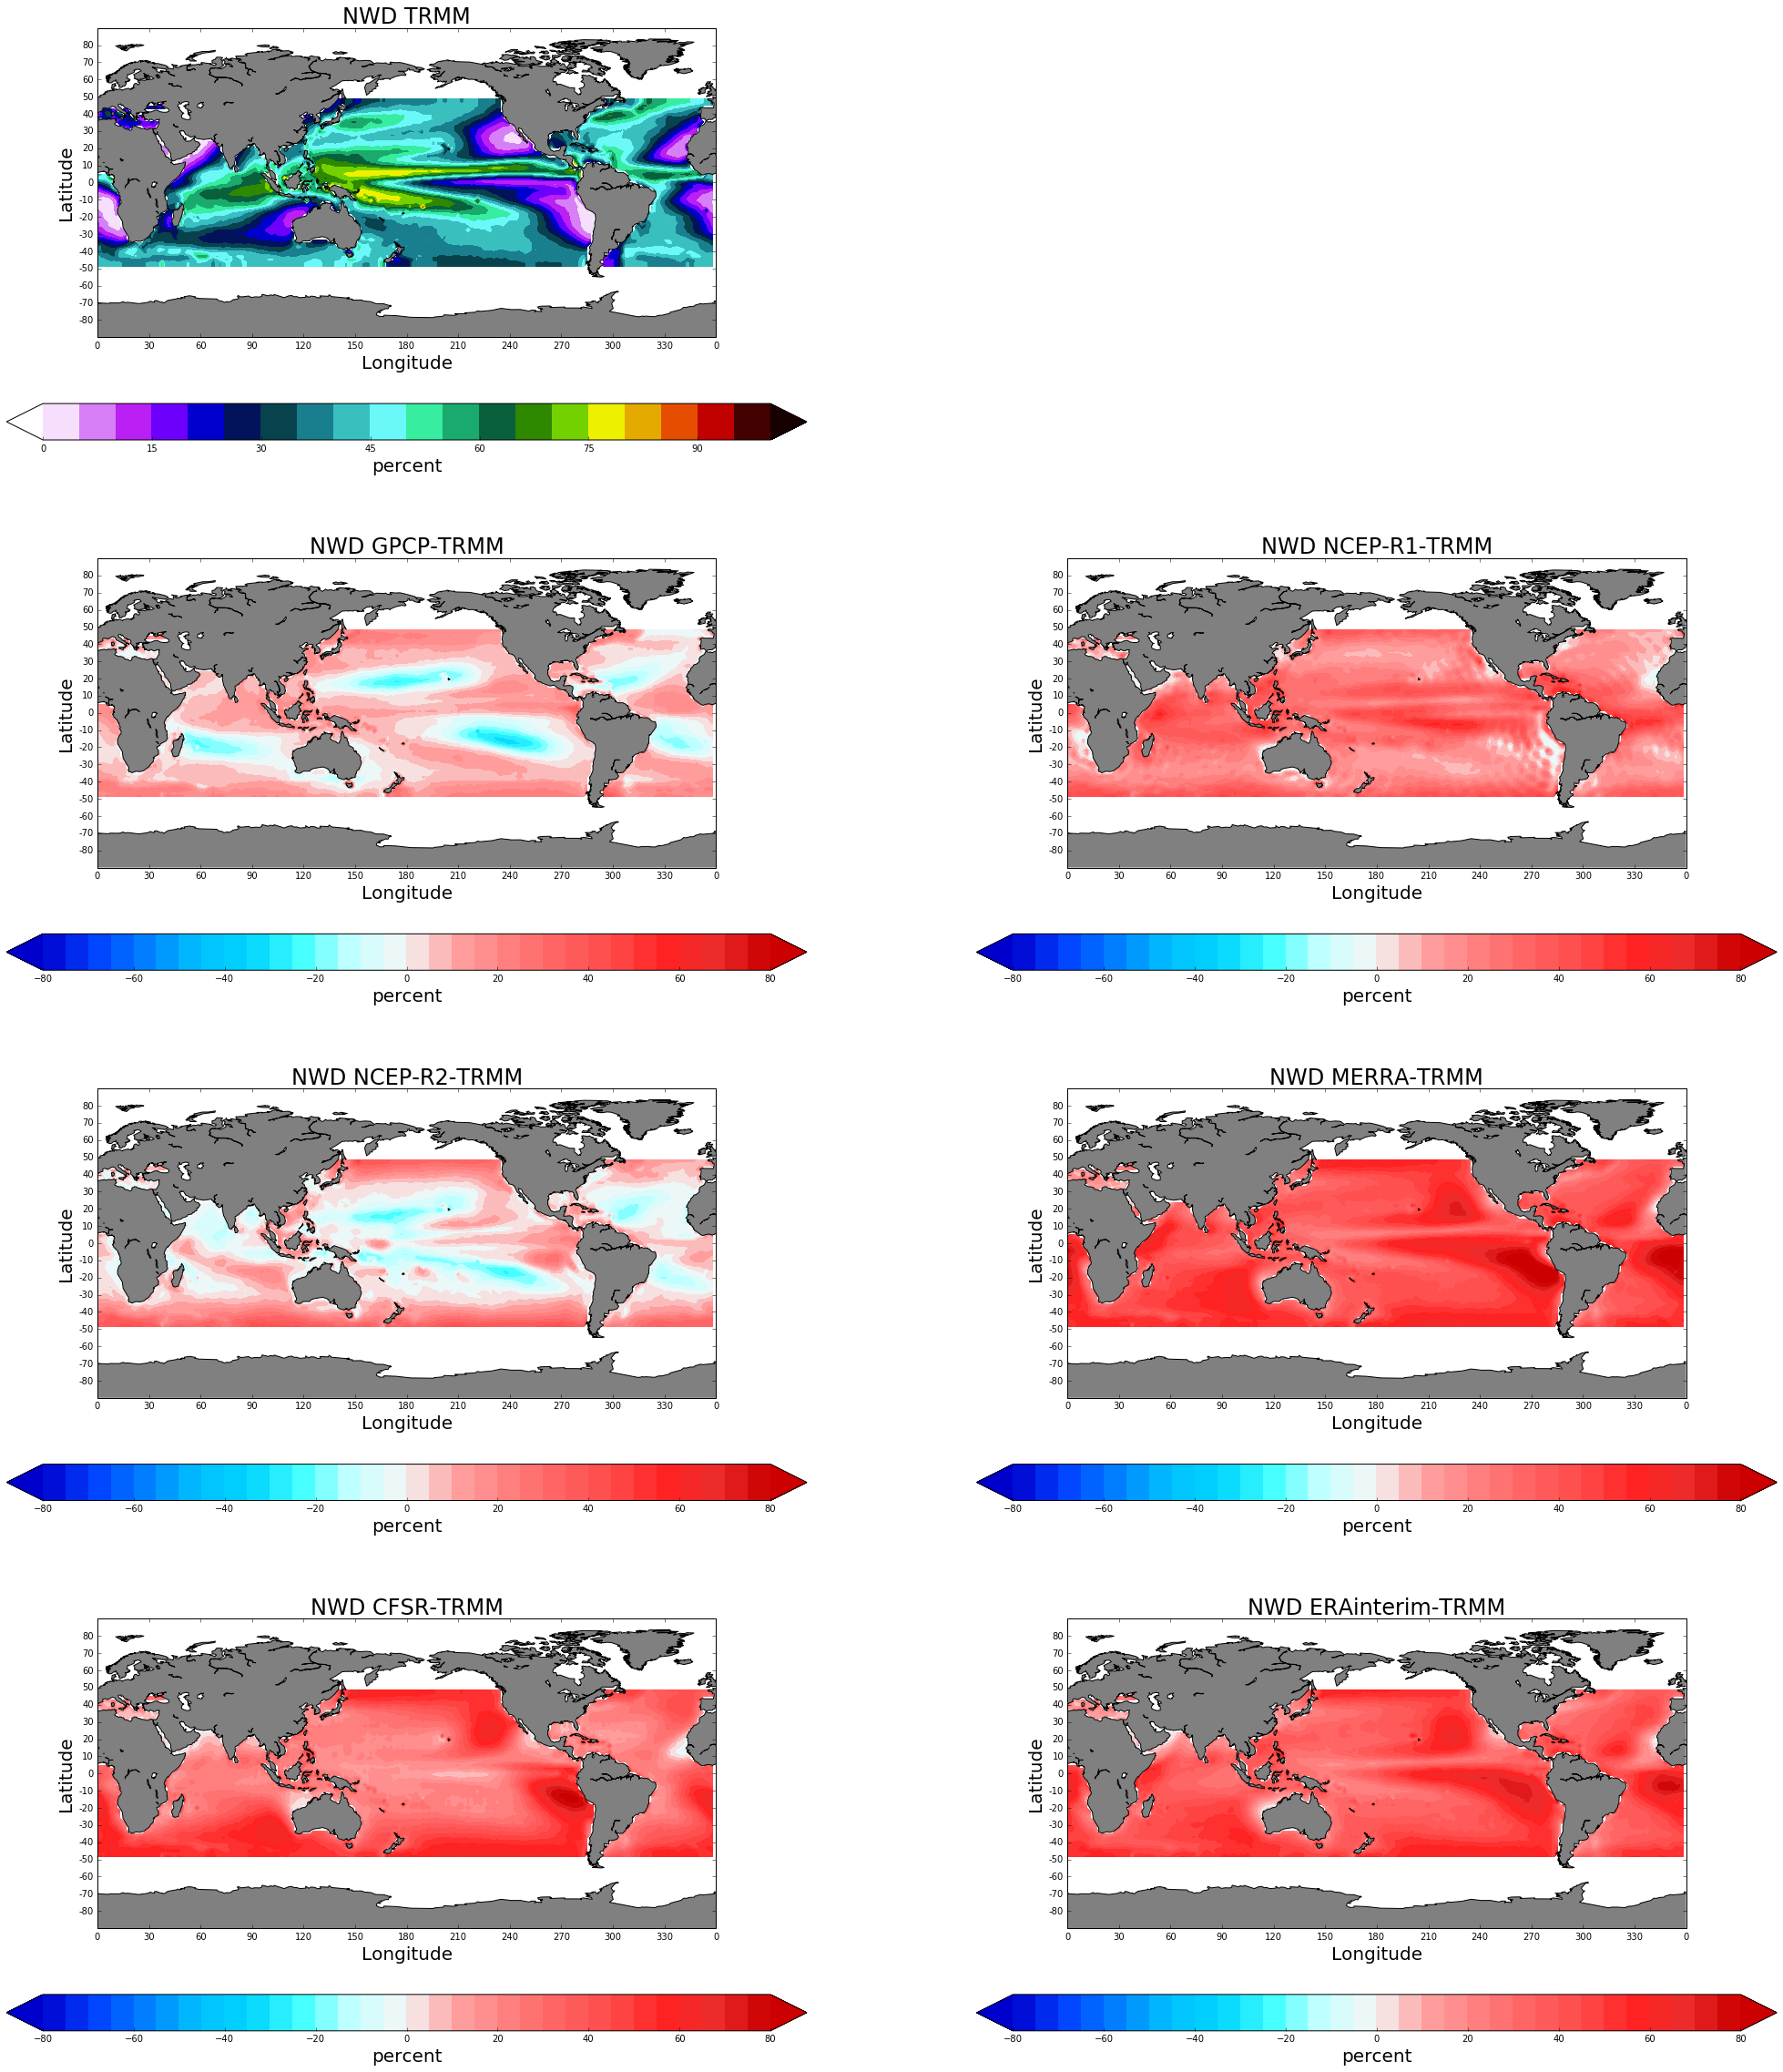

In [29]:
def map_anna1(lat,lon,nwd,title):
    m= Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
    llcrnrlon=0,urcrnrlon=360,resolution='c')
    m.contourf(lon,lat,nwd)
    m.drawcoastlines()
    limits=[0,100]
    norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
    pal = raf.gen_pal_Testu()
    contours = npy.arange(0,105,5)
    #C = m.contour(lon,lat,nwd,contours,linewidths=0.5,color='black')
    C = m.contourf(lon,lat,nwd,contours,cmap=pal,norm=norm,extend='both')
    m.fillcontinents(color='grey',lake_color='white')
    # colorbar      
    cbar = plt.colorbar(C,orientation='horizontal',shrink=0.99)
    plt.clim(limits[0],limits[1])
    cbar.set_label(r'percent',fontsize=20)
    # x axis
    locs, labels = plt.xticks()
    newlocs   = npy.array([0,30,60,90,120,150,180,210,240,270,300,330,360],'f')
    newlabels = npy.array([0,30,60,90,120,150,180,210,240,270,300,330,0],'i')
    plt.xticks(newlocs,newlabels)
    plt.xlabel('Longitude',fontsize=20)
    # y axis
    locsY,labelsy = plt.yticks()
    newlocsy   = npy.array([-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80],'f')
    newlabelsy = npy.array([-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80],'i')
    plt.yticks(newlocsy,newlabelsy)
    plt.ylabel('Latitude',fontsize=20) 
    # title
    plt.title(title,fontsize=24)
    
def map_anna2(lat,lon,nwd,title):
    m= Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
    llcrnrlon=0,urcrnrlon=360,resolution='c')
    m.contourf(lon,lat,nwd)
    m.drawcoastlines()
    limits=[-80,80]
    norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
    pal = raf.gen_pal_blue2red2()
    contours = npy.arange(-80,85,5)
    #C = m.contour(lon,lat,nwd,contours,linewidths=0.5,color='black')
    C = m.contourf(lon,lat,nwd,contours,cmap=pal,norm=norm,extend='both')
    m.fillcontinents(color='grey',lake_color='white')
    # colorbar      
    cbar = plt.colorbar(C,orientation='horizontal',shrink=0.99)
    plt.clim(limits[0],limits[1])
    cbar.set_label(r'percent',fontsize=20)
    # x axis
    locs, labels = plt.xticks()
    newlocs   = npy.array([0,30,60,90,120,150,180,210,240,270,300,330,360],'f')
    newlabels = npy.array([0,30,60,90,120,150,180,210,240,270,300,330,0],'i')
    plt.xticks(newlocs,newlabels)
    plt.xlabel('Longitude',fontsize=20)
    # y axis
    locsY,labelsy = plt.yticks()
    newlocsy   = npy.array([-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80],'f')
    newlabelsy = npy.array([-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80],'i')
    plt.yticks(newlocsy,newlabelsy)
    plt.ylabel('Latitude',fontsize=20) 
    # title
    plt.title(title,fontsize=24)
    

plt.figure(figsize=[35. , 40.])
plt.subplot(4,2,1)
map_anna1(lat2D1,lon2D1,nwd2a_ma[0],'NWD TRMM')
plt.subplot(4,2,3)
map_anna2(lat2D1,lon2D1,nwd1a_ma[0]-nwd2a_ma[0],'NWD GPCP-TRMM')
plt.subplot(4,2,4)
map_anna2(lat2D1,lon2D1,nwd3a_ma[0]-nwd2a_ma[0],'NWD NCEP-R1-TRMM')
plt.subplot(4,2,5)
map_anna2(lat2D1,lon2D1,nwd4a_ma[0]-nwd2a_ma[0],'NWD NCEP-R2-TRMM')
plt.subplot(4,2,6)
map_anna2(lat2D1,lon2D1,nwd5a_ma[0]-nwd2a_ma[0],'NWD MERRA-TRMM')
plt.subplot(4,2,7)
map_anna2(lat2D1,lon2D1,nwd6a_ma[0]-nwd2a_ma[0],'NWD CFSR-TRMM')
plt.subplot(4,2,8)
map_anna2(lat2D1,lon2D1,nwd7a_ma[0]-nwd2a_ma[0],'NWD ERAinterim-TRMM')
plt.savefig('/home/albert/Data/precips/PLOTS/cartes_diff-TRMM_NWD_interp-NCEP_ANNAlike.png')

In [38]:
nwdms1a_ma.shape

(156, 94, 192)

In [22]:
nwd1ts=npy.mean(npy.mean(nwdms1a_ma,1),1)
nwd2ts=npy.mean(npy.mean(nwdms2a_ma,1),1)
nwd3ts=npy.mean(npy.mean(nwdms3a_ma,1),1)
nwd4ts=npy.mean(npy.mean(nwdms4a_ma,1),1)
nwd5ts=npy.mean(npy.mean(nwdms5a_ma,1),1)
nwd6ts=npy.mean(npy.mean(nwdms6a_ma,1),1)
nwd7ts=npy.mean(npy.mean(nwdms7a_ma,1),1)

In [44]:
mean.shape

(156,)

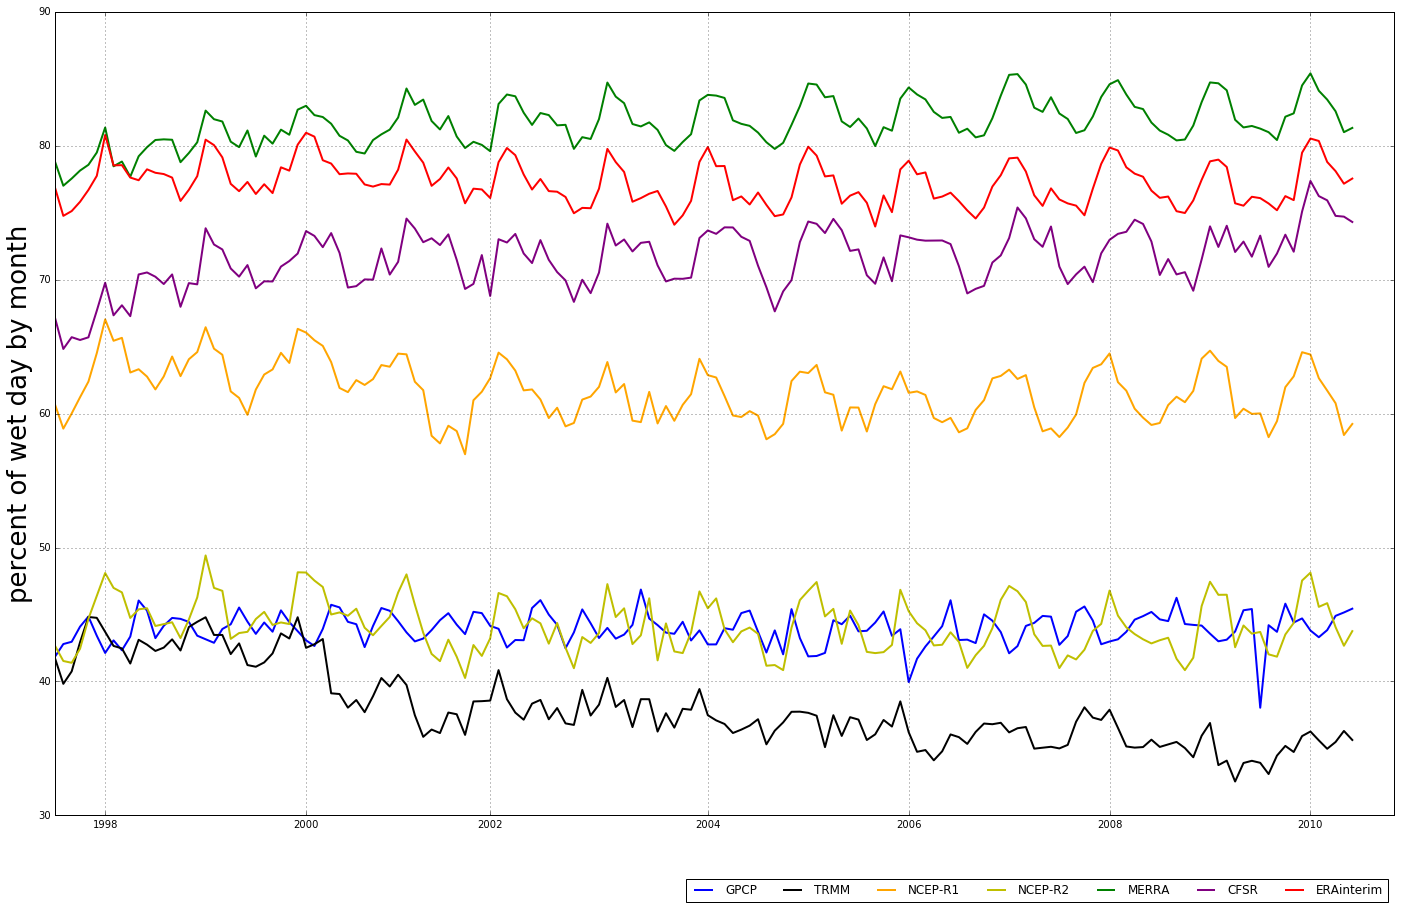

In [32]:
t=[]
for i in npy.arange(1998,2011):
    for j in npy.arange(1,13):
        t.append(mdates.date2num(mdates.datetime.date(i,j,15)))
date=mdates.num2date(t)
fig_size = [24., 16.]
figure = plt.figure(figsize=fig_size)
ax=figure.add_subplot(1,1,1)
ax.plot(nwd1ts,'blue',linewidth=2,label="GPCP")
ax.plot(nwd2ts,'black',linewidth=2,label="TRMM")
ax.plot(nwd3ts,'orange',linewidth=2,label="NCEP-R1")
ax.plot(nwd4ts,'y',linewidth=2,label="NCEP-R2")
ax.plot(nwd5ts,'g',linewidth=2,label="MERRA")
ax.plot(nwd6ts,'purple',linewidth=2,label="CFSR")
ax.plot(nwd7ts,'r',linewidth=2,label="ERAinterim")
plt.grid()
plt.ylabel('percent of wet day by month',fontsize=26)
newlocsx   = npy.array([6,30,52,78,102,126,150],'f')
newlabelsx = npy.array([1998,2000,2002,2004,2006,2008,2010],'i')
plt.xticks(newlocsx,newlabelsx)
bbox = ax.get_position()
ax.set_position([bbox.x0, bbox.y0 + bbox.height * 0.1,bbox.width, bbox.height * 0.9])
ax.legend(('GPCP','TRMM','NCEP-R1','NCEP-R2','MERRA','CFSR','ERAinterim'),bbox_to_anchor=(1., -0.072),ncol=7)
plt.savefig('/home/albert/Data/precips/PLOTS/time_serie_moyenne_globale_mensuelle.png')